## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 7
---------------------------------------

GOALS:

1. Answer all the questions from the lecture - we will use the scientists data and the grocery data.
2. Analyze data about College majors - your first EDA! (Think of this as a practice exam.)

----------------------------------------------------------

This homework has **9 Questions** and **A Practice Exam**

NOTE:
The practice exam is intended to give you an idea of what an exam in this class might feel like. Remember you will be expected to work on the exam **independently** and submit your work before we get together to work on the exam in class. **15\% of your Exam grade will come from what you can do independently** so start practicing now and get help if you need it!.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Lecture Questions

First we will import the data about female scientists.

In [61]:
file1 = 'https://joannabieri.com/introdatascience/data/dates.csv'
DF_dates = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/professions.csv'
DF_professions = pd.read_csv(file2)
file3 = 'https://joannabieri.com/introdatascience/data/works.csv'
DF_works = pd.read_csv(file3)



**Q1** Are each of these data sets Tidy?

**Q2** Do they all contain the same number of observations?

**Q3** What are the five variables?

**Q4** What variable do they have in common - what can we join **on**

1. Yes they are tidy
2. No they do not have the same number of observations
3. the variablea are name, birthyear, deathyear, professions, and knownfor
4. they all have name in common



## Combining Three Data Sets

You need to think about the order and whether or not you want to keep the maximum number of names or only keep names that are in all the data frames.

In this case we will try to keep the maximal amount of data - the maximum number of names.

1. Combine the professions and works data
2. Then add the dates data

In [5]:
# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='left')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='left')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Ada Lovelace,Mathematician,first computer algorithm,NaN,NaN
1,Marie Curie,Physicist and Chemist,"theory of radioactivity, discovery of element...",NaN,NaN
2,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0
3,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0
4,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0
5,Rosalind Franklin,Chemist,NaN,1920.0,1958.0
6,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0
7,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN
8,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN
9,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN


**Q5** What, if anything, would change if you switched to how='right'?

**(Click Here)**

## Combining Two Data Sets - You Try

**Q6** Write code that would combine the professions data and the dates data, but drop any names that don't appear in both.

In [7]:
# Your code here
DF_combined = pd.merge(DF_professions, DF_dates, on='name', how='inner')
DF_combined.head()



,name,profession,birth_year,death_year
0,Janaki Ammal,Botanist,1897,1984.0
1,Chien-Shiung Wu,Physicist,1912,1997.0
2,Katherine Johnson,Mathematician,1918,2020.0
3,Rosalind Franklin,Chemist,1920,1958.0
4,Vera Rubin,Astronomer,1928,2016.0


## Combining Three Data Sets - You Try

**Q7** Try to combine the three data sets together (professions, works, and dates) but instead of doing what we did above, see if you can keep only the names that appeared in all three data sets.

In [9]:
# Your code here
DF_prof_works = pd.merge(DF_professions, DF_works, on='name', how='inner')
DF_combined_all = pd.merge(DF_prof_works, DF_dates, on='name', how='inner')
DF_combined_all.head()



,name,profession,known_for,birth_year,death_year
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0
3,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0
4,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN


## Case study - Grocery Sales

Below you will load some data about grocery sales and see how joining or merging data can help us answer questions.

In [15]:
file1 = 'https://joannabieri.com/introdatascience/data/purchases.csv'
DF_purchases = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/prices.csv'
DF_prices = pd.read_csv(file2)
show(DF_purchases)
show(DF_prices)



## Calculate the total revenue

**Q8** Given the data above find the total revenue.

We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. In this case both data frames have **item** as a column.

Now, think about how to calculate revenue... we need to add up the total money we made, so we need to know the price of each thing sold.

**PAUSE - see if you can write some of the code for this before looking at the cells below**

In [14]:
item_counts = DF_purchases['item'].value_counts().reset_index()
item_counts.columns = ['item', 'quantity'] 

DF_merged = pd.merge(item_counts, DF_prices, on='item', how='inner')
DF_merged['revenue'] = DF_merged['quantity'] * DF_merged['price']

total_revenue = DF_merged['revenue'].sum()
total_revenue



5.75

In [8]:
#

In [9]:
#

In [10]:
#

**See the lecture notes if you need heelp figuring this out!**

**Q9** Calculate the revenue per customer? Hint - group by the customer id and then apply the sum().

In [16]:
# Your code here
customer_item_counts = DF_purchases.groupby(['customer_id', 'item']).size().reset_index(name='quantity')

DF_merged = pd.merge(customer_item_counts, DF_prices, on='item', how='inner')

DF_merged['revenue'] = DF_merged['quantity'] * DF_merged['price']

revenue_per_customer = DF_merged.groupby('customer_id')['revenue'].sum().reset_index()

revenue_per_customer


,customer_id,revenue
0,1,1.95
1,2,3.80


# Practice Exam - EDA - College Majors

Your solutions should include code written to answer the questions AND words describing the results. For each problem:

1. Write code to get the answers. It is okay to copy and paste from our lecture notes or your homework assignments.
2. Describe what the code output is telling you.
3. Explain any interesting aspects of your results.

------------------------
-------------------------

The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [17]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

In [18]:
DF_raw

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables?
* How man observations?
* Are the variables categorical or numerical?
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


In [ ]:
#21 variables

In [16]:
#173 observations

In [17]:
#both categorical and numerical variables

**(Click Here to Explain your Results)**

### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [37]:
DF_filtered = DF_raw[['Major', 'Unemployment_rate']]
lowest_unemployment = DF_filtered.loc[DF_filtered['Unemployment_rate'].idxmin()]
lowest_unemployment_df = pd.DataFrame(lowest_unemployment).T

print(lowest_unemployment_df)


                               Major Unemployment_rate
52  MATHEMATICS AND COMPUTER SCIENCE          0.000000


In [38]:
DF_filtered_women = DF_raw[['Major', 'Women']]

highest_women_percentage = DF_filtered_women.loc[DF_filtered_women['Women'].idxmax()]
highest_women_percentage_df = pd.DataFrame(highest_women_percentage).T
highest_women_percentage_df

,Major,Women
145,PSYCHOLOGY,307087.000000


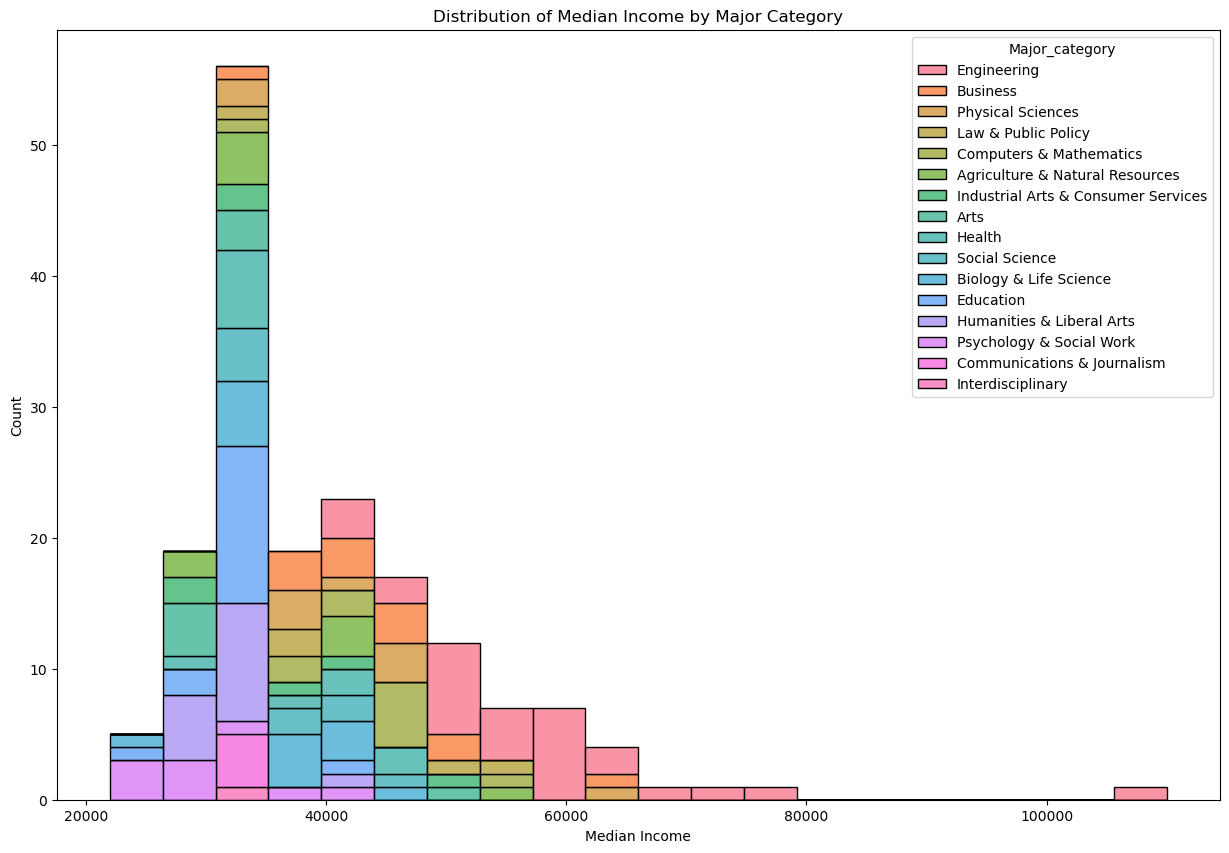

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.histplot(data=DF_raw, x='Median', hue='Major_category', multiple='stack', bins=20)
plt.title('Distribution of Median Income by Major Category')
plt.xlabel('Median Income')
plt.ylabel('Count')
plt.show()


Median shows a better distribution since outliers can skew data
Engineering has the higher median income
I chose the number of bins just to make the data appea clearer

### 3. More complicated questions

* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories
    
  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

In [60]:
stem_categories = ["Biology & Life Science", "Computers & Mathematics", "Engineering", "Physical Sciences"]
mask = DF_raw['Major_category'].isin(stem_categories)
DF_stem = DF_raw[mask]

filtered_stem = DF_stem[['Major', 'Median', 'Proportion_Women']]

print(filtered_stem)


                                         Major  Median  Proportion_Women
0                        PETROLEUM ENGINEERING  110000          0.120564
1               MINING AND MINERAL ENGINEERING   75000          0.101852
2                    METALLURGICAL ENGINEERING   73000          0.153037
3    NAVAL ARCHITECTURE AND MARINE ENGINEERING   70000          0.107313
4                         CHEMICAL ENGINEERING   65000          0.341631
..                                         ...     ...               ...
110       ATMOSPHERIC SCIENCES AND METEOROLOGY   35000          0.321296
122                      MISCELLANEOUS BIOLOGY   33500          0.556604
123                                    BIOLOGY   33400          0.601858
132                                    ECOLOGY   33000          0.576360
168                                    ZOOLOGY   26000          0.637293

[64 rows x 3 columns]


In [54]:
stem_categories = ["Biology & Life Science", "Computers & Mathematics", "Engineering", "Physical Sciences"]
DF_stem = DF_raw[DF_raw['Major_category'].isin(stem_categories)]

overall_median_salary = DF_raw['Median'].median()
low_salary_stem_majors = DF_stem[DF_stem['Median'] <= overall_median_salary]

print(low_salary_stem_majors[['Major', 'Median']])


                                     Major  Median
90                             GEOSCIENCES   36000
92                   ENVIRONMENTAL SCIENCE   35600
97   MULTI-DISCIPLINARY OR GENERAL SCIENCE   35000
101                             PHYSIOLOGY   35000
105             COMMUNICATION TECHNOLOGIES   35000
108                           NEUROSCIENCE   35000
110   ATMOSPHERIC SCIENCES AND METEOROLOGY   35000
122                  MISCELLANEOUS BIOLOGY   33500
123                                BIOLOGY   33400
132                                ECOLOGY   33000
168                                ZOOLOGY   26000


                                             Major  Proportion_Women
164                      EARLY CHILDHOOD EDUCATION          0.968954
163  COMMUNICATION DISORDERS SCIENCES AND SERVICES          0.967998
51                      MEDICAL ASSISTING SERVICES          0.927807
138                           ELEMENTARY EDUCATION          0.923745
150                   FAMILY AND CONSUMER SCIENCES          0.910933
100                        SPECIAL NEEDS EDUCATION          0.906677
156      HUMAN SERVICES AND COMMUNITY ORGANIZATION          0.905590
151                                    SOCIAL WORK          0.904075
34                                         NURSING          0.896019
88        MISCELLANEOUS HEALTH MEDICAL PROFESSIONS          0.881294


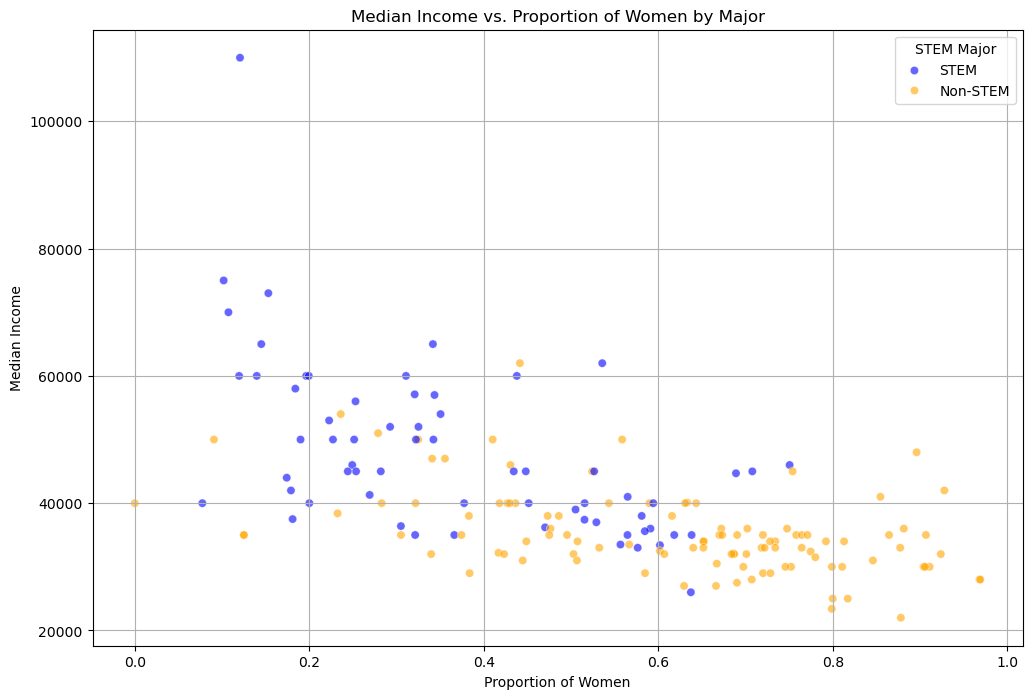

In [48]:
DF_raw['Proportion_Women'] = DF_raw['Women'] / DF_raw['Total']
top_women_majors = DF_raw.nlargest(10, 'Proportion_Women')[['Major', 'Proportion_Women']]

print(top_women_majors)

stem_categories = ["Biology & Life Science", "Computers & Mathematics", "Engineering", "Physical Sciences"]
DF_raw['Is_STEM'] = DF_raw['Major_category'].isin(stem_categories)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=DF_raw, x='Proportion_Women', y='Median', hue='Is_STEM', palette={True: 'blue', False: 'orange'}, alpha=0.6)
plt.title('Median Income vs. Proportion of Women by Major')
plt.xlabel('Proportion of Women')
plt.ylabel('Median Income')
plt.legend(title='STEM Major', labels=['STEM', 'Non-STEM'])
plt.grid()
plt.show()


**(Click Here to Explain your Results)**

### 4. Ask a question of interest to you.

In [24]:
#I don't have any at the moment

**(Click Here to Explain your Results)**